# Characterizing UPEC transcriptional state during *in vivo* infection

## 2018-01-29

This will hopefully correspond to **Figure 2** in the final manuscript. 

* Correlations
    - UR vs UTI
    - B1 vs B2 (in UR and in UTI)
* Transcription across genome
    - Ribosomal genes
    - Other operons of interest
* PCA 
    - UR vs UTI
    - B1 vs B2

### 1. Import and Normalize RPKMs for all 14 strains
    - Using iverse rank normalization
    

In [1]:
import pandas as pd
import os
import numpy as np
import scipy as ss
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib notebook
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/data/processed_counts/2018-01-29_combined_counts.csv"


In [2]:
counts = pd.read_csv(data, index_col=0)
to_drop = [c for c in list(counts.columns) if 'counts' in c or 'Unnamed' in c or 'seq' in c]
to_drop.append('MG1655')
# Only interested in RPKMs and core genome, but without MG1655
counts.drop(to_drop, axis=1, inplace=True)
counts.dropna(inplace=True)
counts.set_index('CFT073', inplace=True)
counts = counts.select_dtypes(include=["float64"])

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,8,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Normalization Function
def invnorm(x):
    return scipy.stats.norm.ppf((x.rank() -0.5)/x.count())

<IPython.core.display.Javascript object>


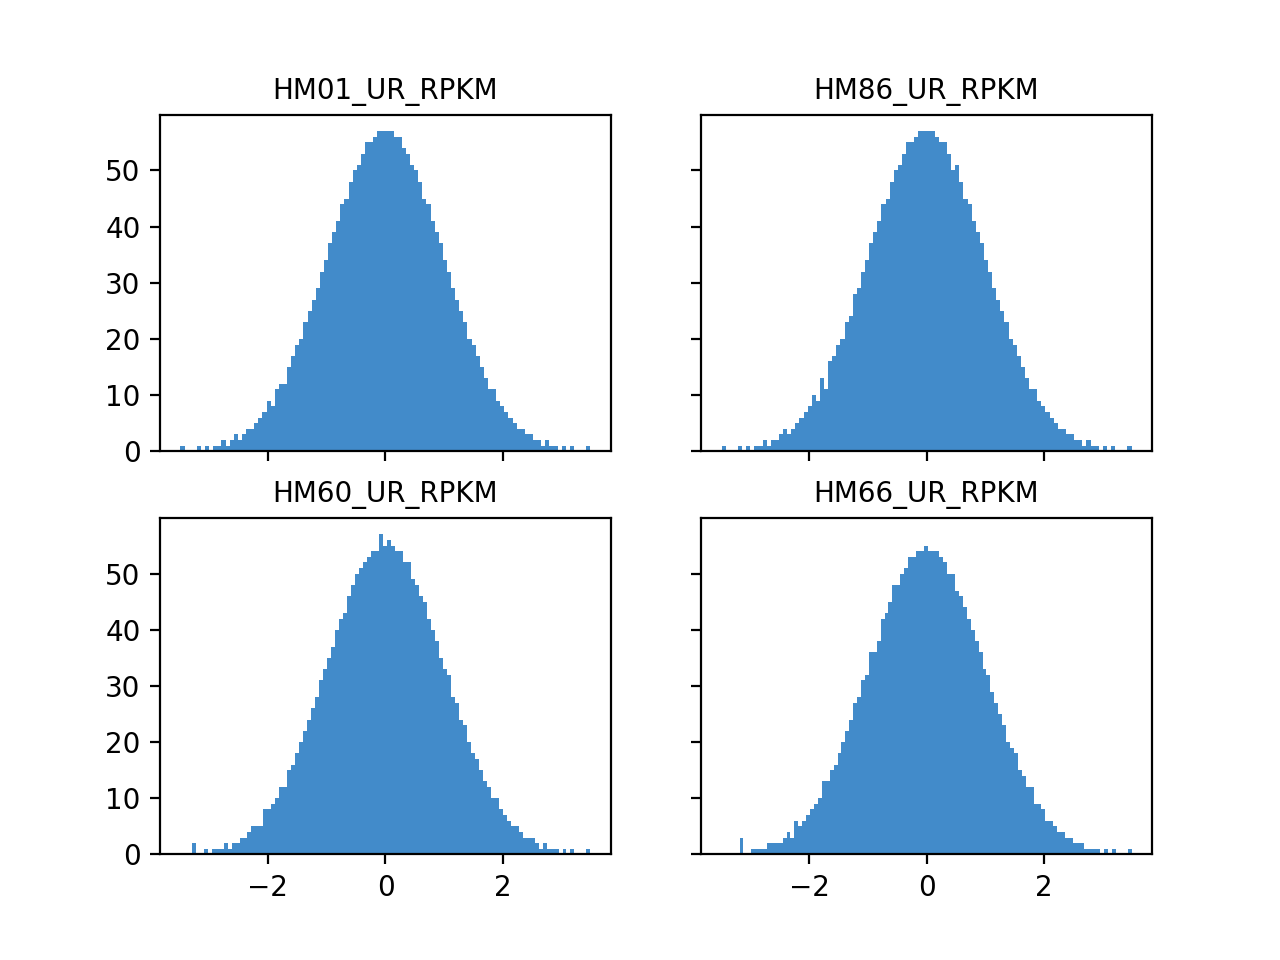

In [4]:
#Applying to the RPKMs
cc_norm = counts.apply(invnorm)

#Draw histograms for a couple to make sure normal distribution: HM01, HM86, HM60, HM66
# For HM01 and HM86 have good coverge for UTI samples, not so for HM60 and HM66
sam = ["HM01", "HM86", "HM60", "HM66"]
ur_suffix = "_UR_RPKM"
uti_suffix = "_UTI_RPKM"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4]

#Urine histograms
for n in range(len(sam)):
    sample = sam[n]+ur_suffix
    axs[n].hist(cc_norm[sample], 100, color = "#428bca")
    axs[n].set_title(sample, fontsize=10)

<IPython.core.display.Javascript object>


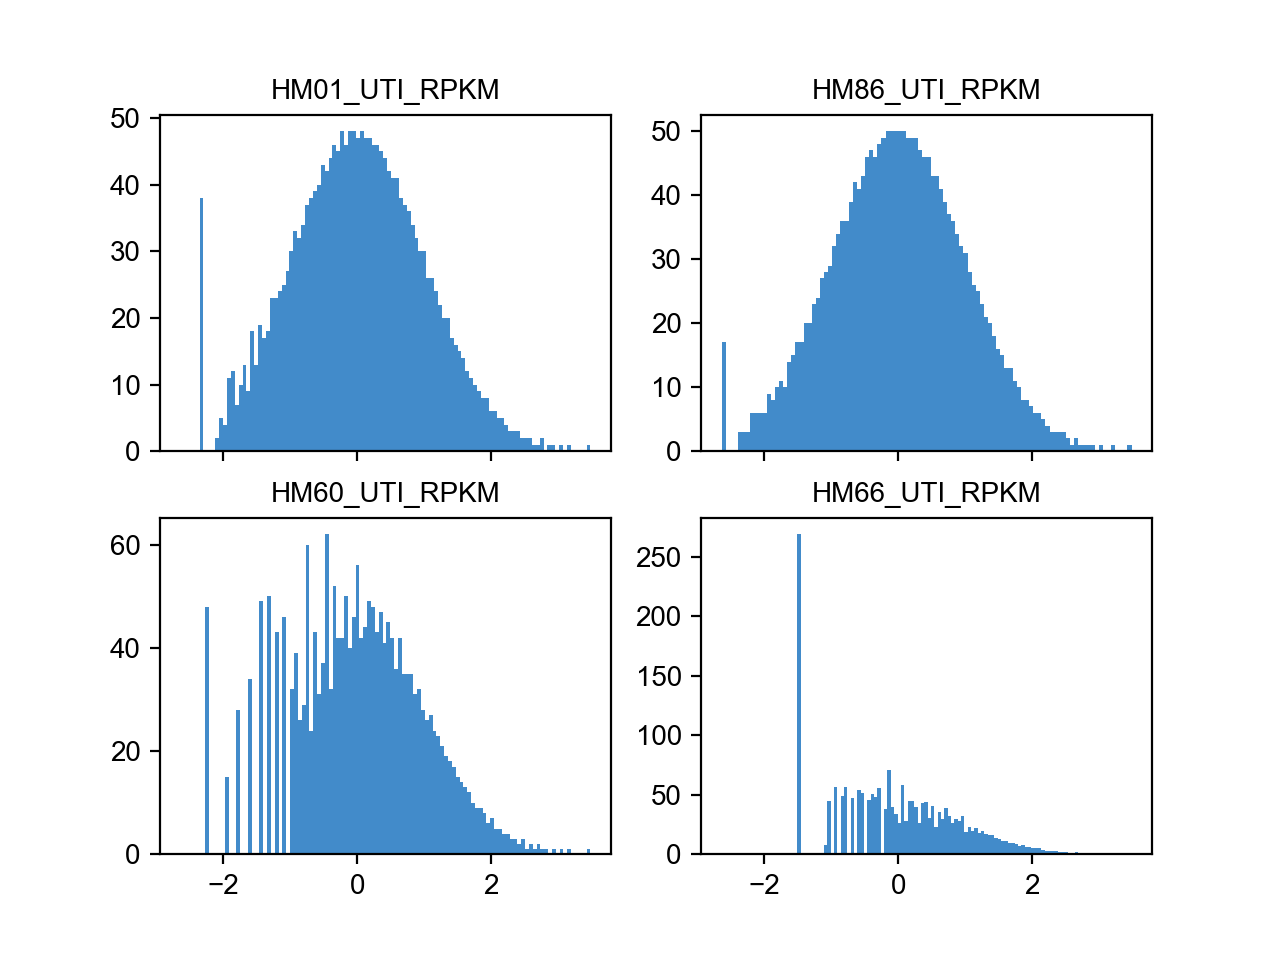

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
#UTI histograms
for n in range(len(sam)):
    sample = sam[n]+uti_suffix
    axs[n].hist(cc_norm[sample], 100, color = "#428bca")
    axs[n].set_title(sample, fontsize=10)

<IPython.core.display.Javascript object>


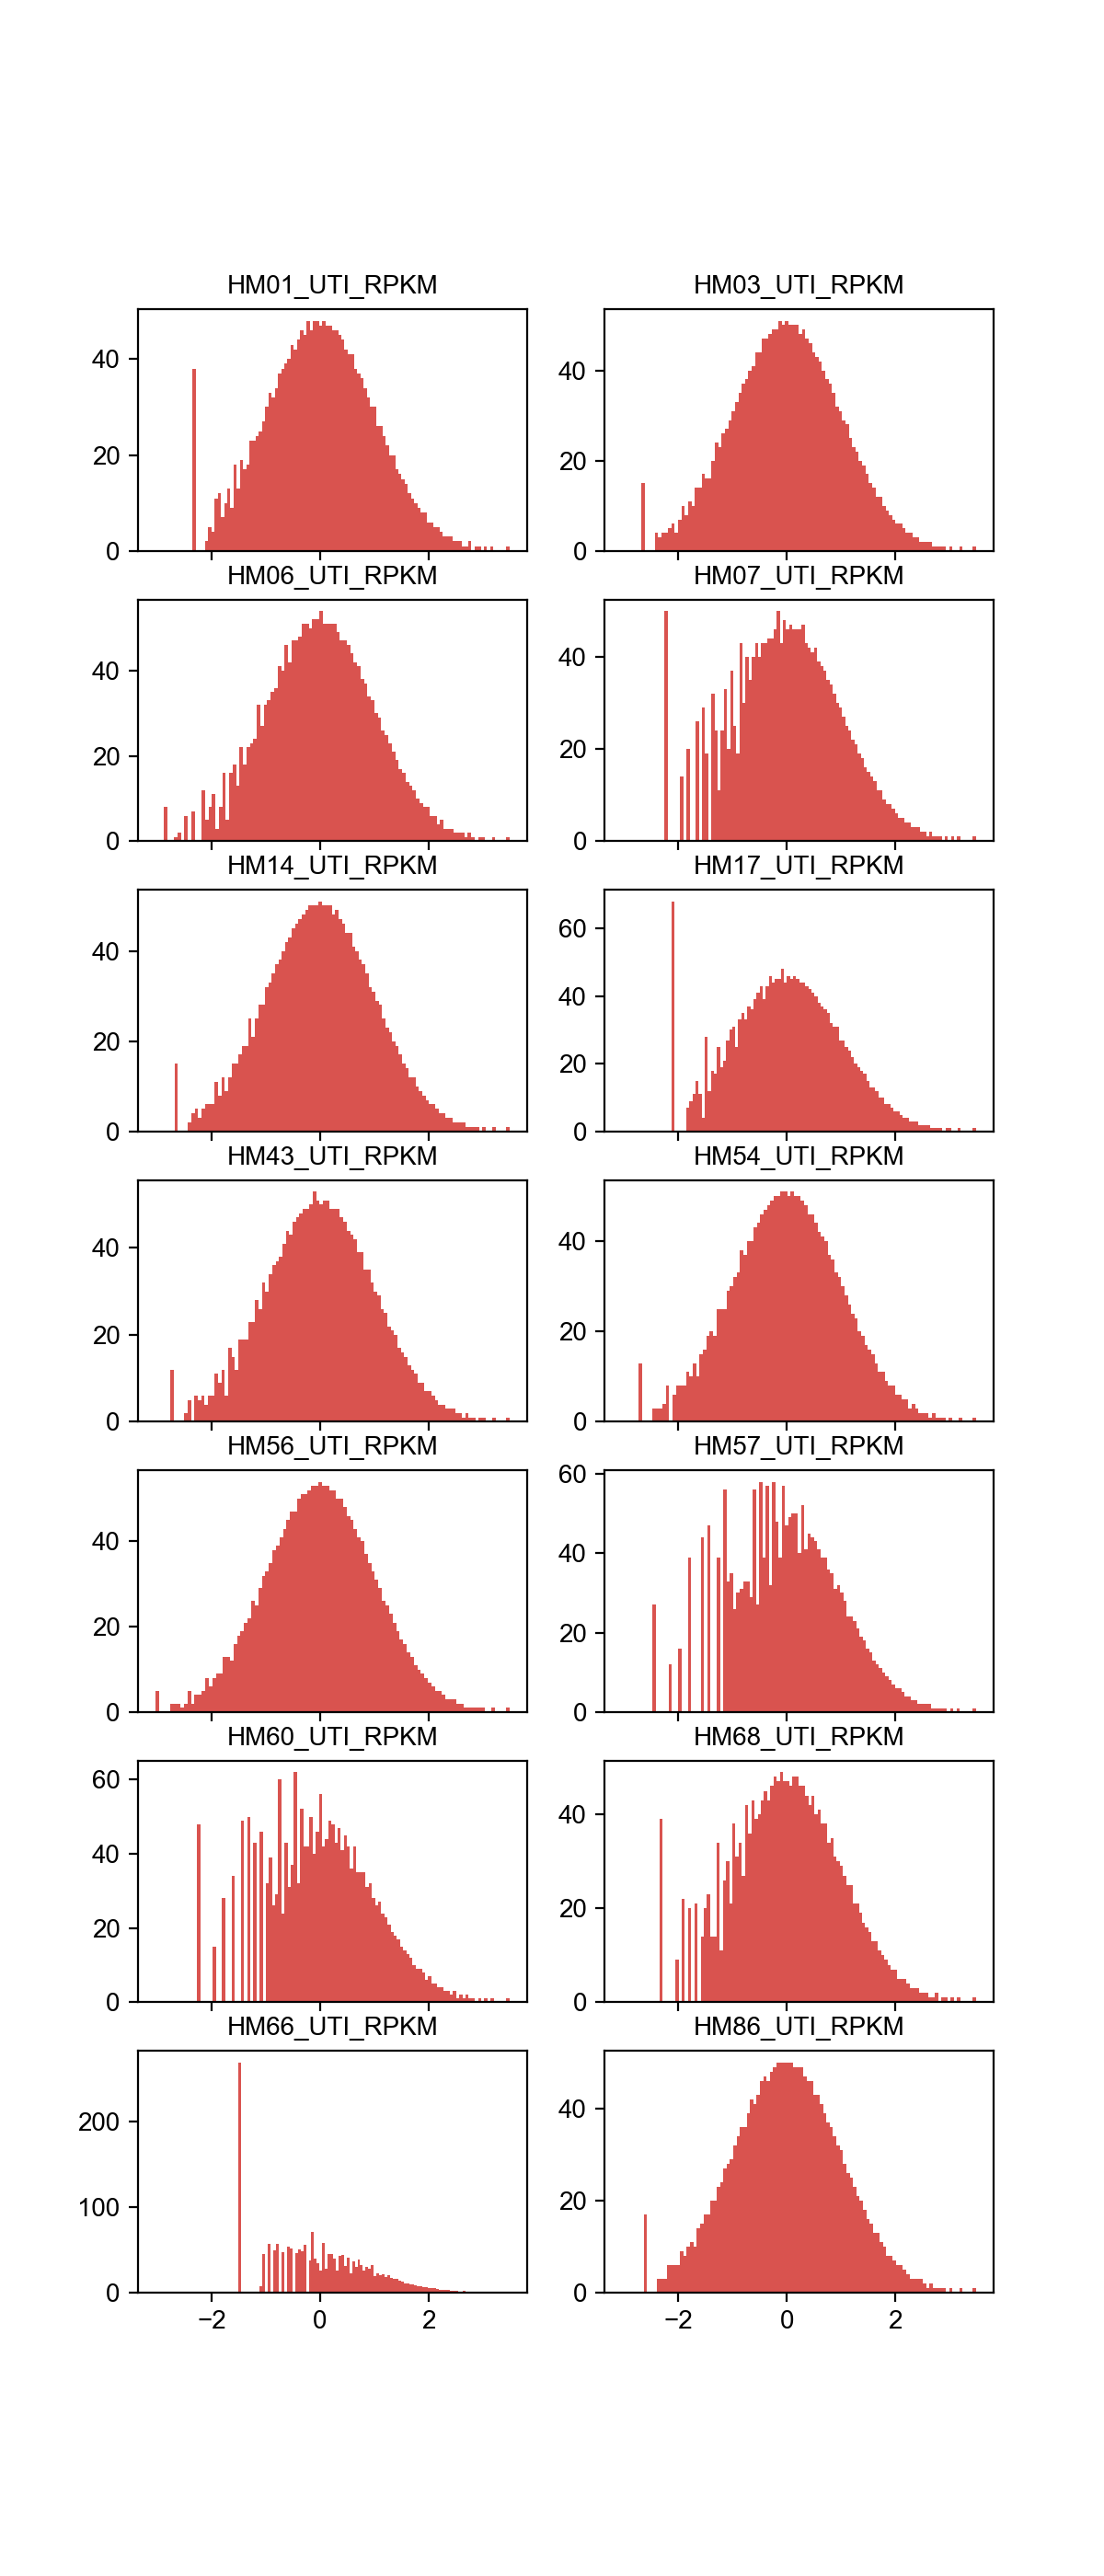

In [6]:
#HM66 looks bad, going to check all of the UTI samples
fig, ((ax1, ax2), (ax3, ax4),
     (ax5,ax6), (ax7, ax8),
     (ax9, ax10), (ax11, ax12),
     (ax13, ax14)) = plt.subplots(7, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]
#plt.figure(figuresize)
uti_col=[c for c in list(cc_norm.columns) if "UTI" in c]

for n in range(len(uti_col)):
    sample = uti_col[n]
    axs[n].hist(cc_norm[sample], 100, color = "#d9534f")
    axs[n].set_title(sample, fontsize=10)   
fig = plt.gcf()
fig.set_size_inches(6,14)

#HM66 is not good! Others look ok (Maybe HM54)

### 2. Look at correlation in gene expression between UR and UTI samples
#### 2.1 Draw scatter plots with UR samples on Y-axis and UTI samples on X-axis


In [7]:

#Using seaborn
import seaborn as sns; sns.set_style("ticks")


<IPython.core.display.Javascript object>


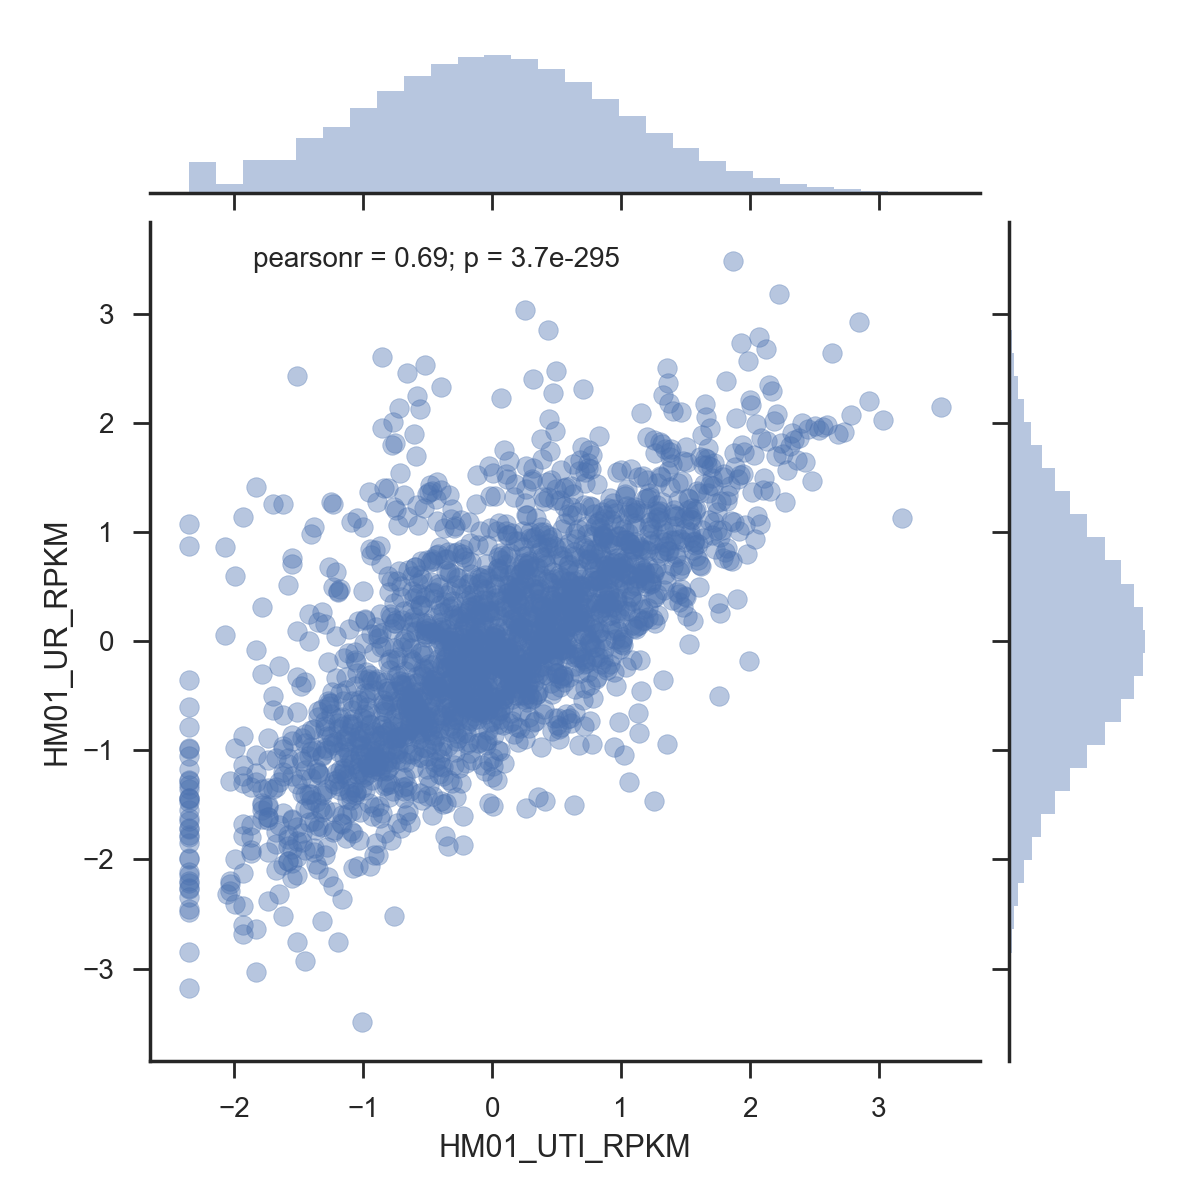

<IPython.core.display.Javascript object>


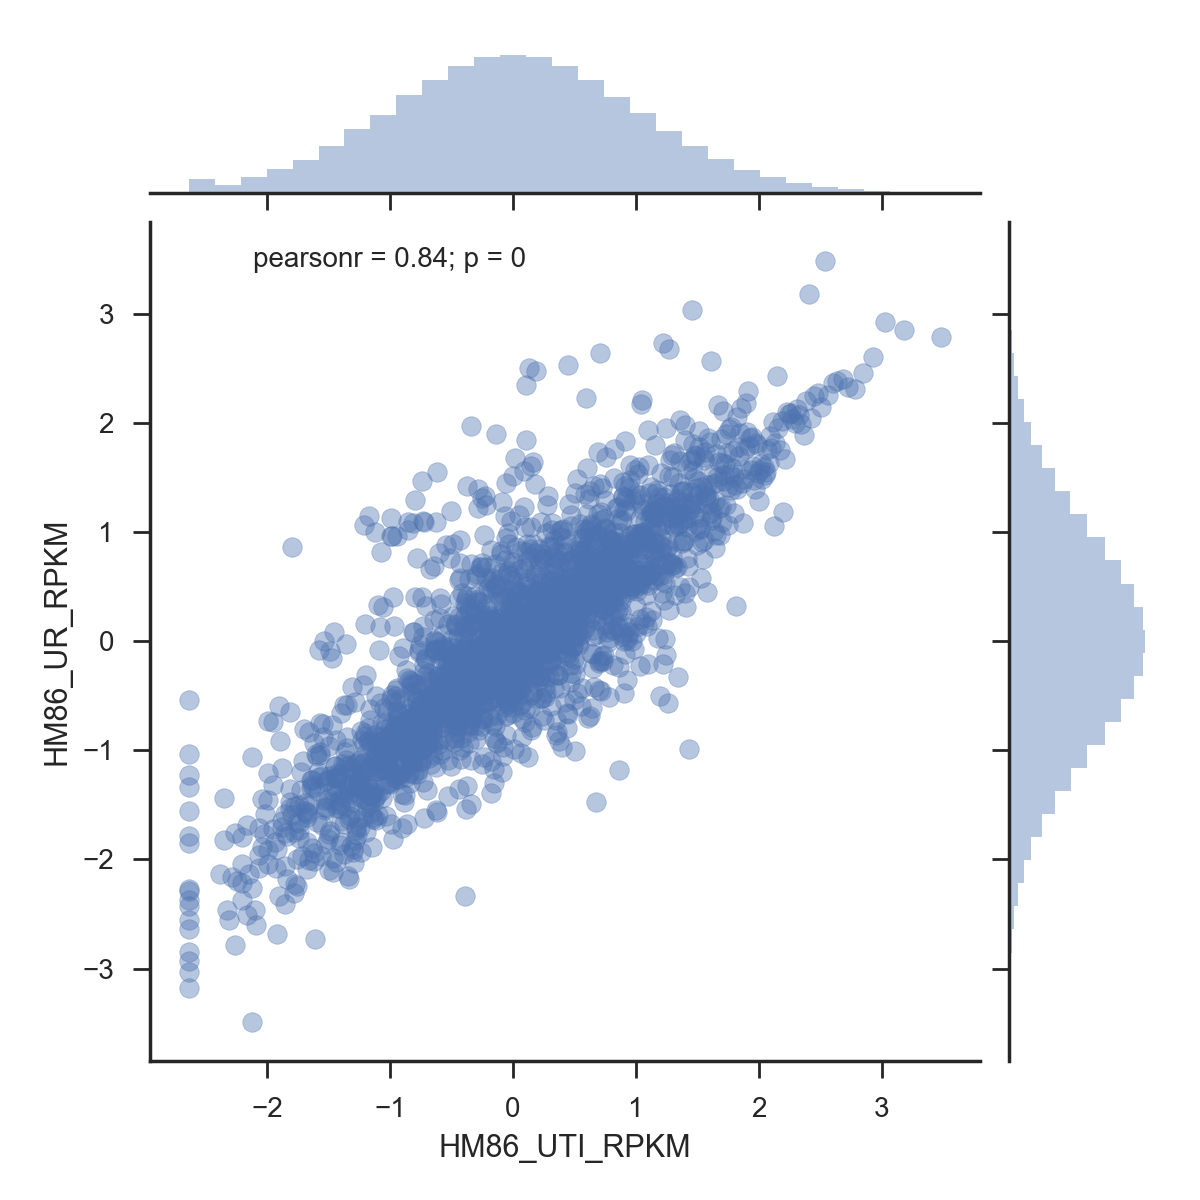

<IPython.core.display.Javascript object>


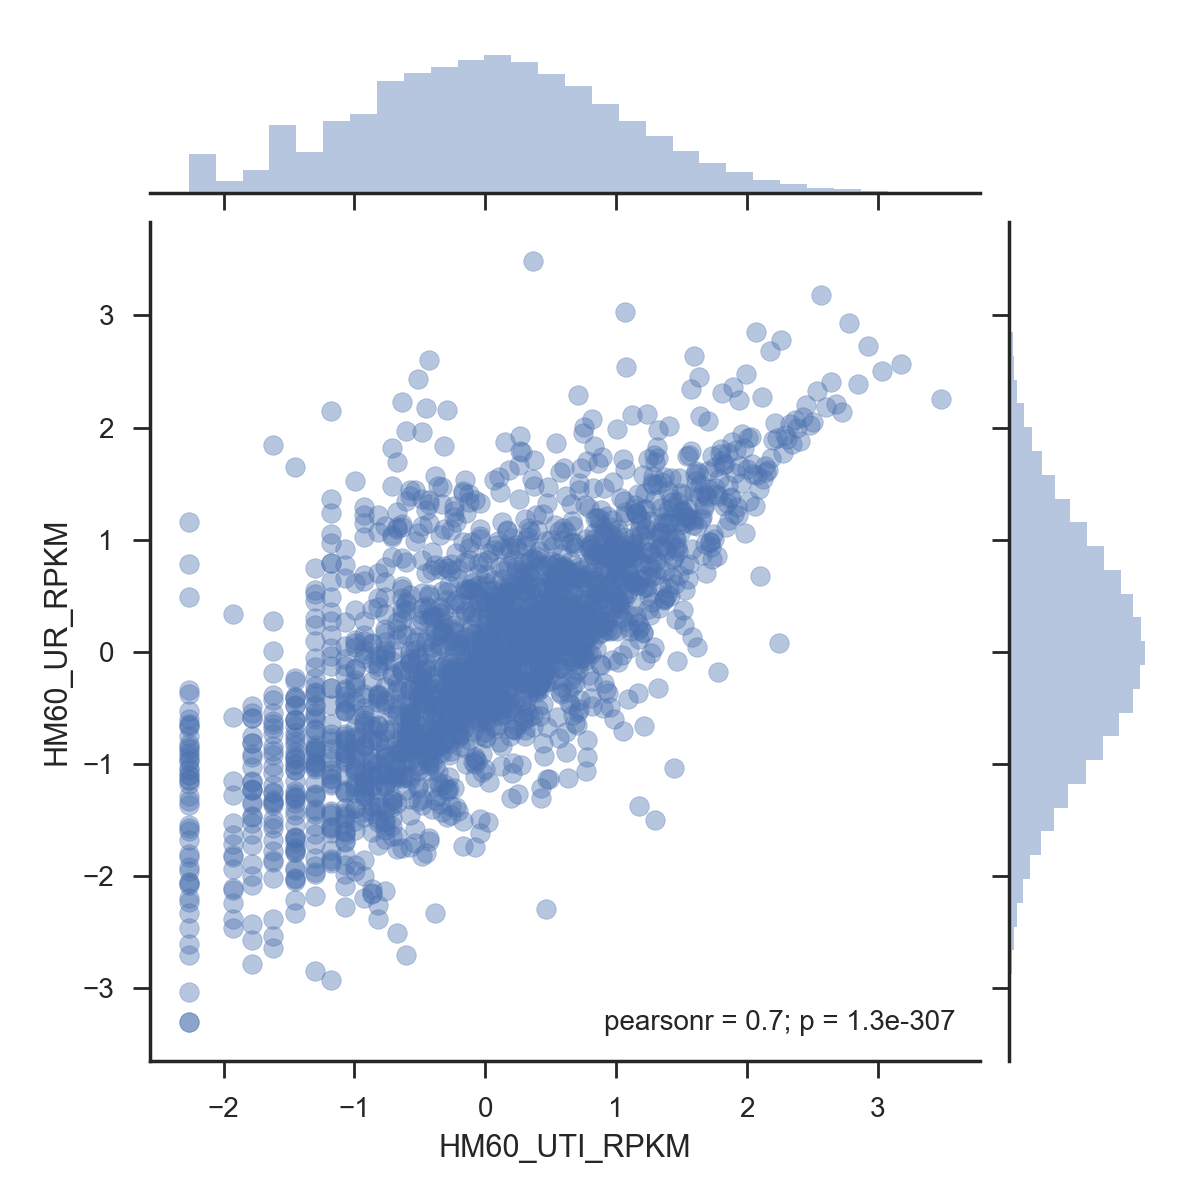

<IPython.core.display.Javascript object>


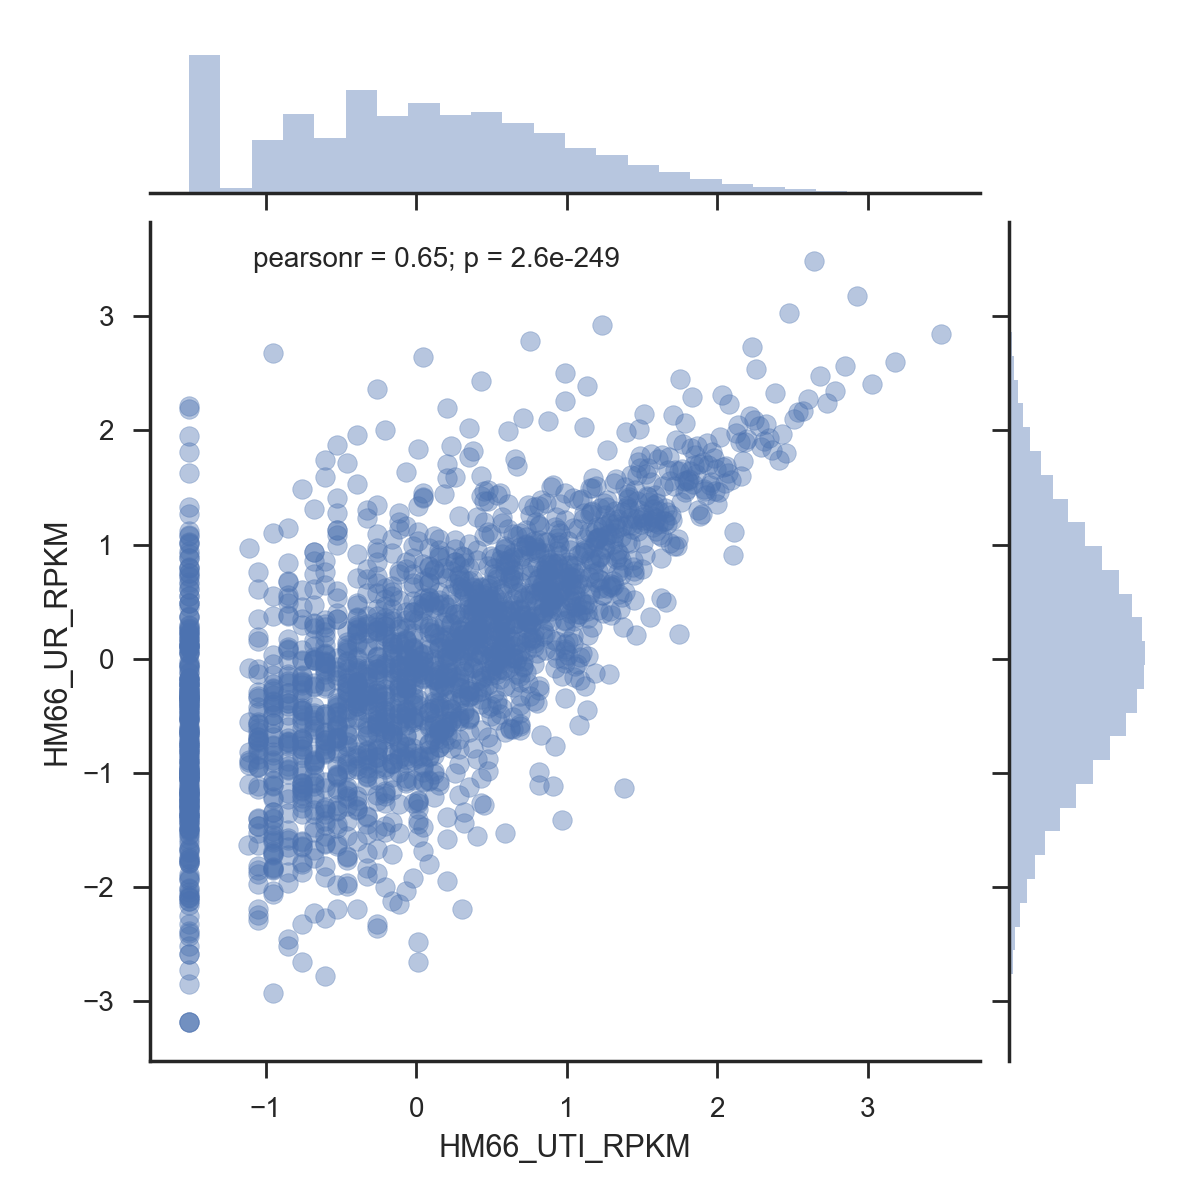

In [8]:

for s in sam:
    v1 = cc_norm[s+uti_suffix]
    v2 = cc_norm[s+ur_suffix]
    f = sns.jointplot(v1, v2, alpha=0.4);
    
# Again there are clearly issues with the data... Have to address somehow

<IPython.core.display.Javascript object>


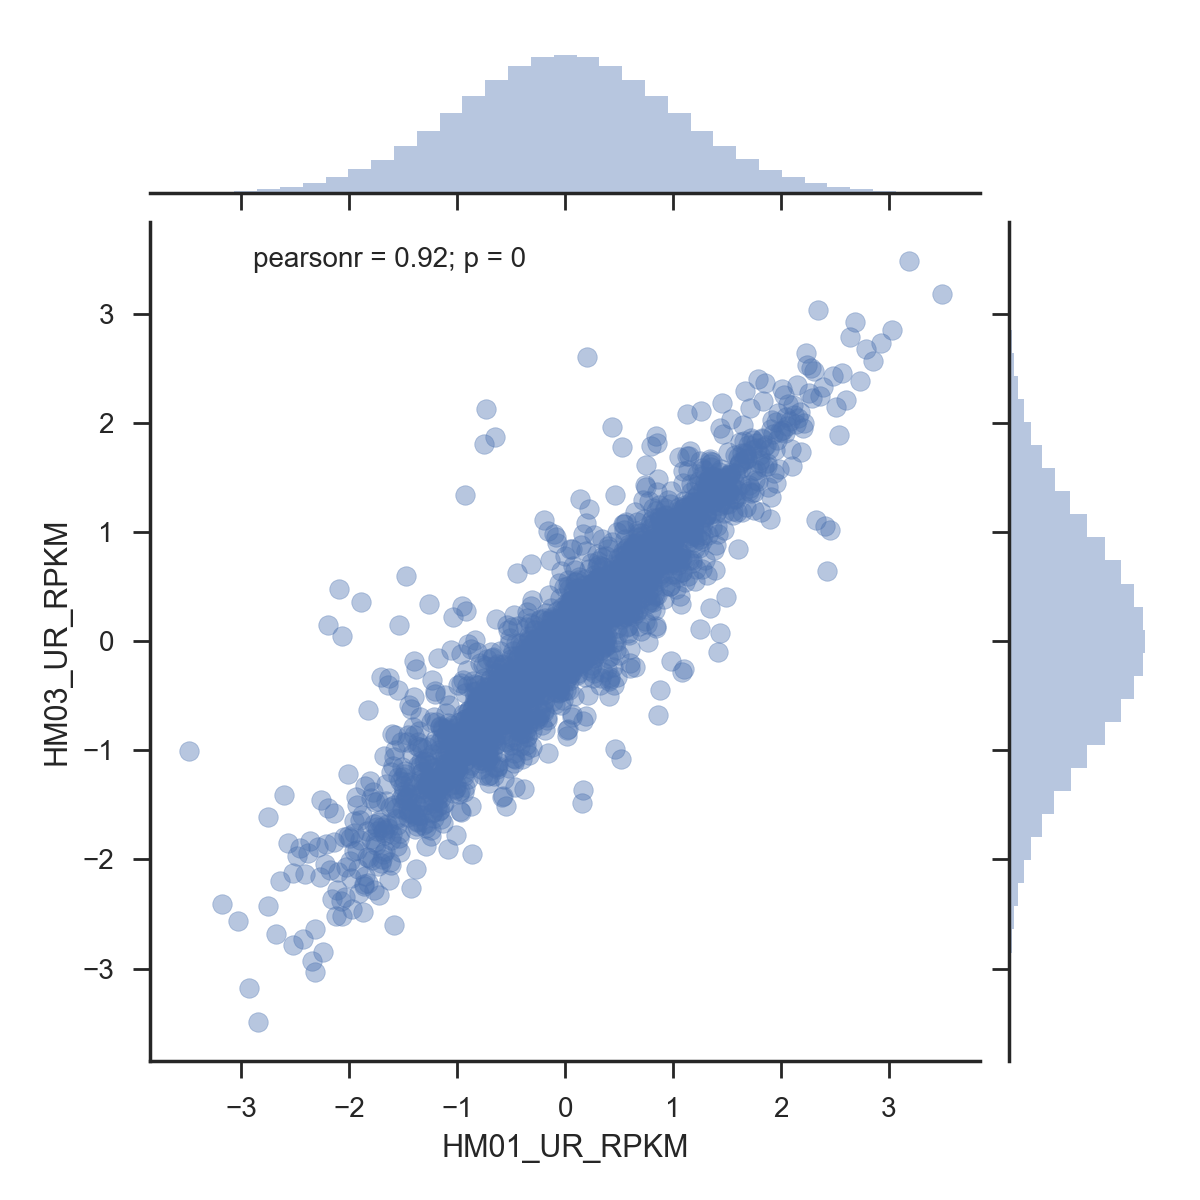

In [16]:
v1 = cc_norm["HM01_UR_RPKM"]
v2 = cc_norm["HM03_UR_RPKM"]
f = sns.jointplot(v1, v2, alpha=0.4);

#### 2.2 Calculate Person correlations

Between all strains:

In [9]:
import itertools

uti_col=[c for c in list(cc_norm.columns) if "UTI" in c]
ur_col = [c for c in list(cc_norm.columns) if "UR" in c]

uti_tuples = list(itertools.combinations(uti_col, 2))
ur_tuples = list(itertools.combinations(ur_col,2))
ur_vs_uti = list(itertools.product(ur_col, uti_col))

ur_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in ur_tuples]                    
uti_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in uti_tuples]
ur_vs_uti = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in ur_vs_uti]
own_strain = [cc_norm[u].corr(cc_norm[t], method='pearson') for u,t in zip(ur_col, uti_col)]

ur_df = pd.DataFrame({"sample":["UR/UR"]*len(ur_corr), "pearson":ur_corr})
uti_df = pd.DataFrame({"sample":["UTI/UTI"]*len(uti_corr), "pearson":uti_corr})
ur_vs_uti_df = pd.DataFrame({"sample":["UR/UTI"]*len(ur_vs_uti), "pearson":ur_vs_uti})
os_df = pd.DataFrame({"sample":["UR/UTI:matched"]*len(own_strain), "pearson":own_strain})

data = pd.concat([ur_df, uti_df, ur_vs_uti_df, os_df])


<IPython.core.display.Javascript object>


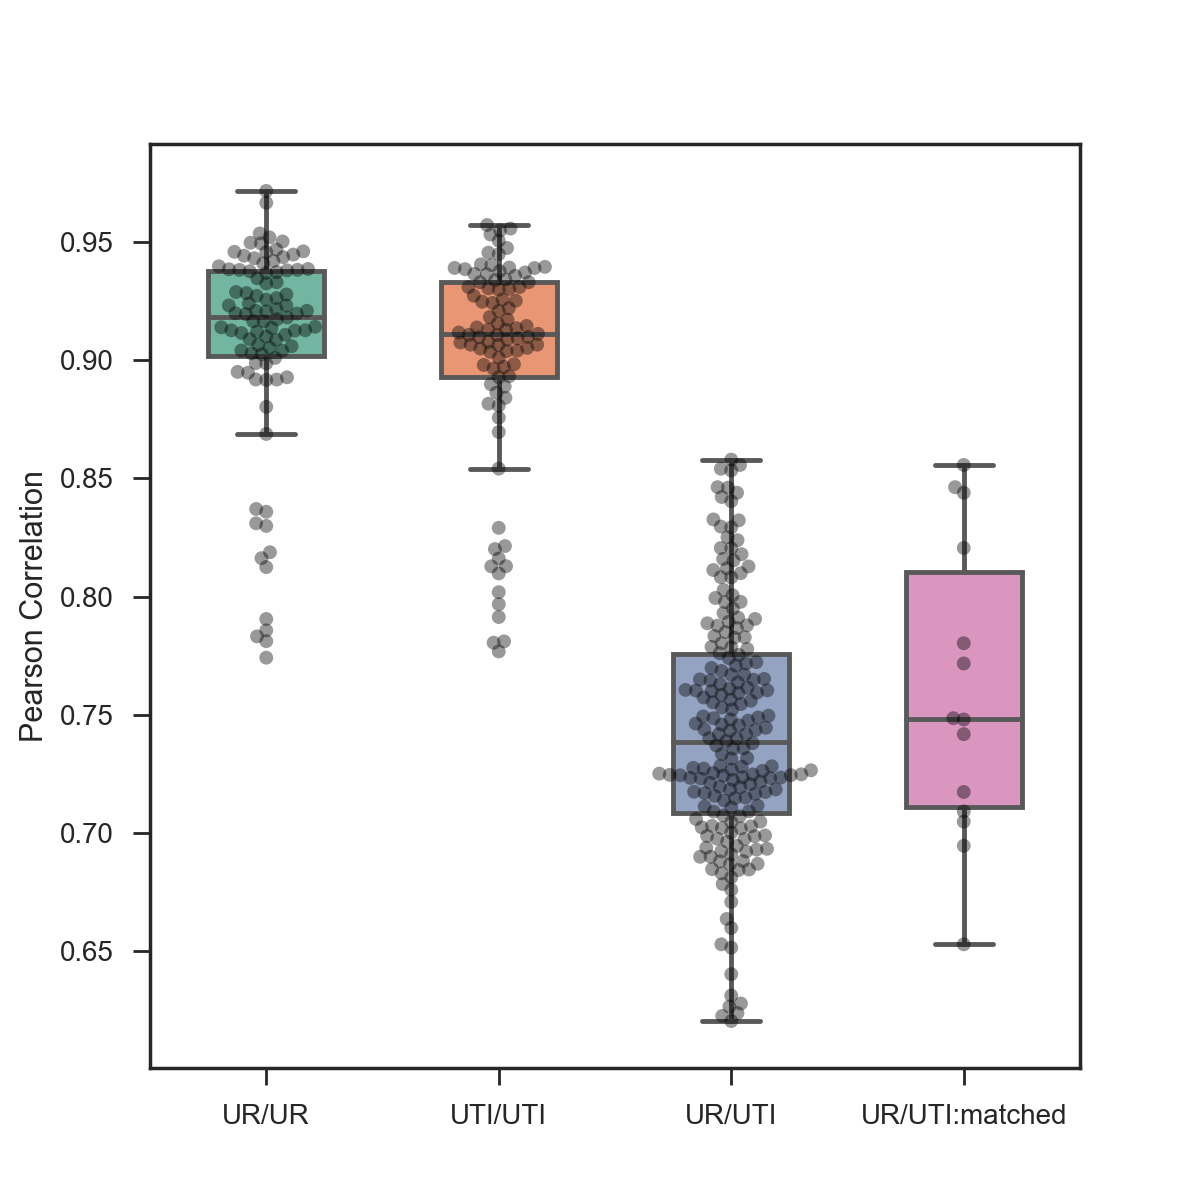

In [10]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x = "sample", y = "pearson", data = data, palette="Set2", width=.5, showfliers=False)
ax = sns.swarmplot(x = "sample", y = "pearson", data = data, color = 'black', alpha = 0.4)
ax.set(xlabel='', ylabel='Pearson Correlation')
plt.show()

By phylogroup:

In [11]:
b1 = ["HM03", "HM07", "HM14", "HM60"]
e = ["HM01"]

# Variables: b1, b2, ur, uti
def getCombinations(samples):#passing in a list of lists
    sampl_dict = {}
    for s in samples:
        sample_dict[s] = list(itertools.combinations(s, 2))
        
    prod = list(itertools.combinations(samples, 2))
    for p in prod:
        sample_dict[p]
    return sample_dict


In [12]:
b1 = ["HM03", "HM07", "HM14", "HM60"]
e = ["HM01"]
b1_ur = [s for s in ur_col if s.split('_')[0] in b1]
b2_ur = [s for s in ur_col if s.split('_')[0] not in (b1 + e)]
b1_uti = [s for s in uti_col if s.split('_')[0] in b1]
b2_uti = [s for s in uti_col if s.split('_')[0] not in (b1 + e)]

b2_uti_tuples = list(itertools.combinations(b2_uti, 2))
b2_ur_tuples = list(itertools.combinations(b2_ur, 2))
b1_uti_tuples = list(itertools.combinations(b1_uti, 2))
b1_ur_tuples = list(itertools.combinations(b1_ur, 2))
b1_b2_uti_tuples = list(itertools.product(b1_uti, b2_uti))
b1_b2_ur_tuples = list(itertools.product(b1_ur, b2_ur))


b2_ur_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in b2_ur_tuples]                    
b2_uti_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in b2_uti_tuples]
b1_ur_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in b1_ur_tuples]                    
b1_uti_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in b1_uti_tuples]
b1_b2_uti_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in b1_b2_uti_tuples]
b1_b2_ur_corr = [cc_norm[t[0]].corr(cc_norm[t[1]], method='pearson') for t in b1_b2_ur_tuples]

b2_ur_df = pd.DataFrame({"sample":["B2|UR"]*len(b2_ur_corr), "pearson":b2_ur_corr})
b2_uti_df = pd.DataFrame({"sample":["B2|UTI"]*len(b2_uti_corr), "pearson":b2_uti_corr})
b1_ur_df = pd.DataFrame({"sample":["B1|UR"]*len(b1_ur_corr), "pearson":b1_ur_corr})
b1_uti_df = pd.DataFrame({"sample":["B1|UTI"]*len(b1_uti_corr), "pearson":b1_uti_corr})
b1_b2_uti_df = pd.DataFrame({"sample":["B1|B2|UTI"]*len(b1_b2_uti_corr), "pearson":b1_b2_uti_corr})
b1_b2_ur_df = pd.DataFrame({"sample":["B1|B2|UR"]*len(b1_b2_ur_corr), "pearson":b1_b2_ur_corr})


data_ur = pd.concat([b2_ur_df,  b1_ur_df, b1_b2_ur_df])


<IPython.core.display.Javascript object>


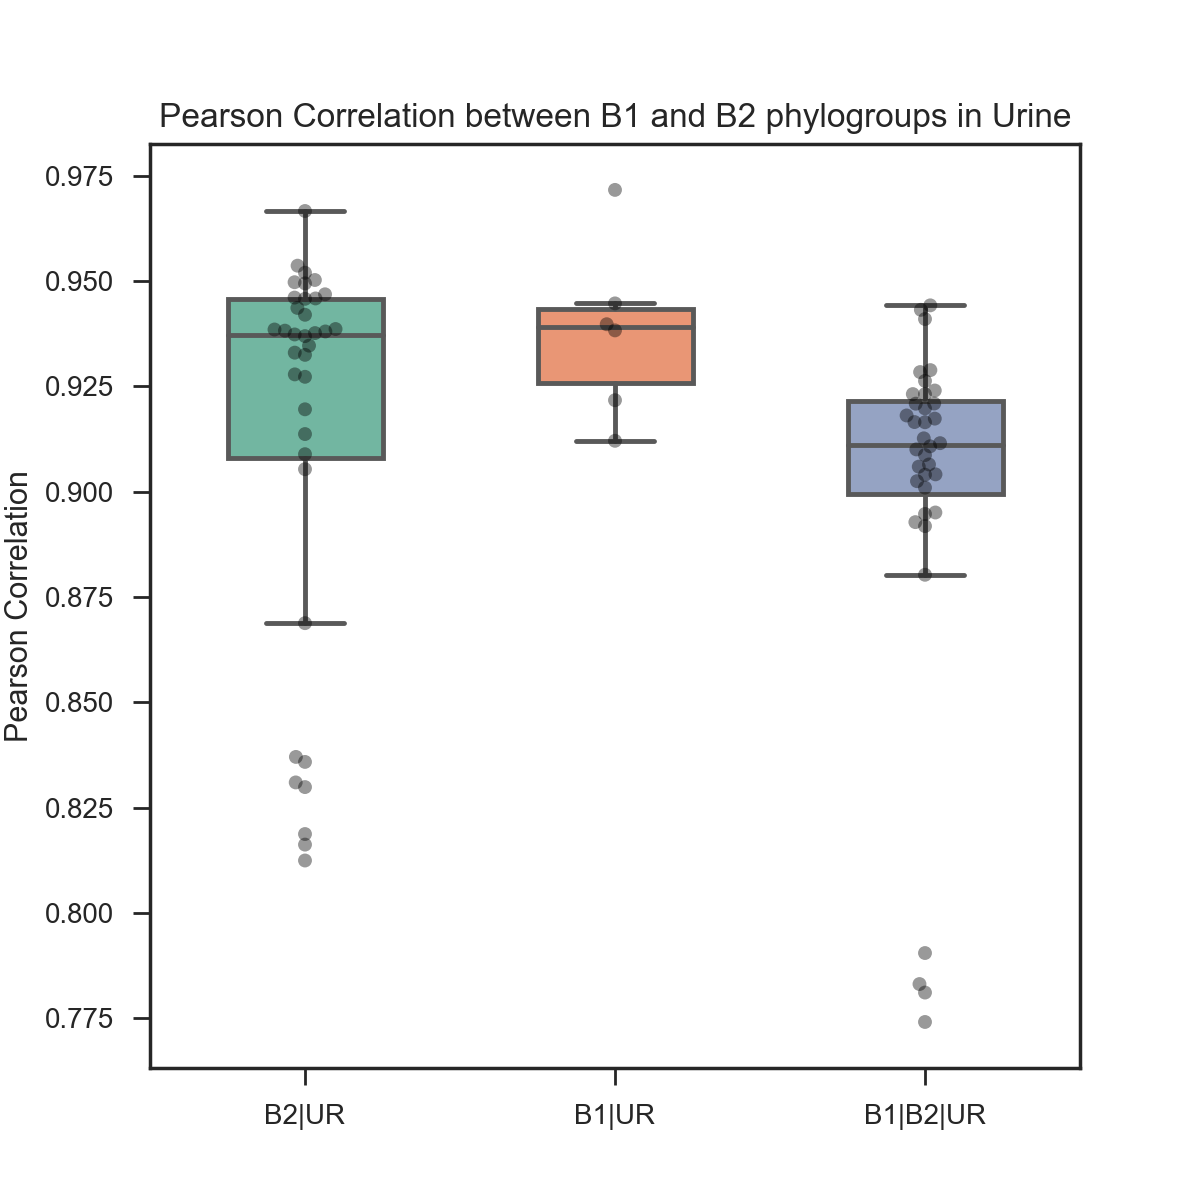

In [13]:
sns.set_style("ticks")
plt.figure(figsize=(6,6))
ax = sns.boxplot(x = "sample", y = "pearson", data = data_ur, palette="Set2", width=.5, showfliers=False)
ax = sns.swarmplot(x = "sample", y = "pearson", data = data_ur, color="black", alpha = 0.4)
ax.set(title= "Pearson Correlation between B1 and B2 phylogroups in Urine", xlabel='', ylabel='Pearson Correlation')
plt.show()


<IPython.core.display.Javascript object>


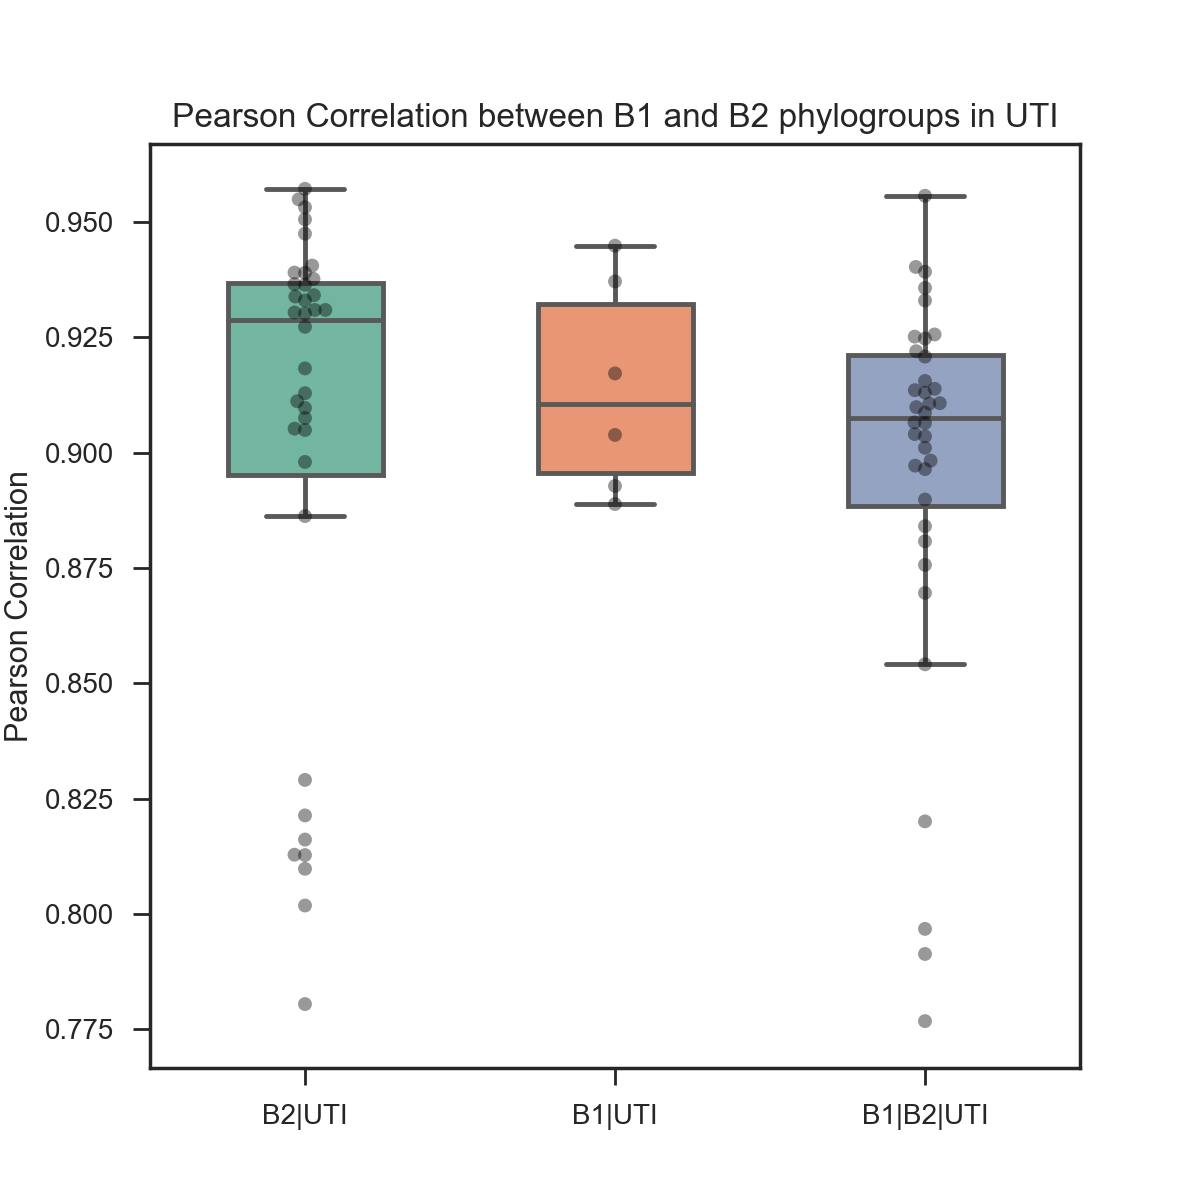

In [14]:
data_uti = pd.concat([b2_uti_df,b1_uti_df,b1_b2_uti_df])
plt.figure(figsize=(6,6))
ax = sns.boxplot(x = "sample", y = "pearson", data = data_uti, palette="Set2", width=.5, showfliers=False)
ax = sns.swarmplot(x = "sample", y = "pearson", data = data_uti, color="black", alpha = 0.4)
ax.set(title= "Pearson Correlation between B1 and B2 phylogroups in UTI", xlabel='', ylabel='Pearson Correlation')
plt.show()

#### 2.3 PCA analysis

In [18]:
pca_table = cc_norm.T

pca_table.head()

CFT073            c0382     c0387     c0417     c0478     c0716     c1155  \
HM01_UR_RPKM  -1.797886  1.565094 -0.060563 -1.398539 -0.176374  1.305545   
HM01_UTI_RPKM -1.873672  0.536364 -0.763982 -1.403433 -0.743675 -0.434532   
HM03_UR_RPKM  -1.440394  1.457864 -0.409137 -0.856525 -0.226290  1.147392   
HM03_UTI_RPKM -1.217498  0.781286 -0.650883 -1.024994 -0.957061 -0.043421   
HM06_UR_RPKM  -1.216217  1.430119  0.190052 -0.705518 -0.647110  1.649602   

CFT073            c1683     c2266     c2615     c3022    ...        c5474  \
HM01_UR_RPKM  -1.644854 -0.730838 -0.187563 -2.243291    ...    -0.416460   
HM01_UTI_RPKM -1.384055 -0.346748 -0.290780 -1.236972    ...     0.270430   
HM03_UR_RPKM  -1.709723 -0.882399  0.091221 -2.848670    ...    -0.299721   
HM03_UTI_RPKM -2.682058 -0.613551  0.028738 -2.682058    ...     0.348697   
HM06_UR_RPKM  -1.410010 -0.685274  0.166447 -2.567486    ...     0.076496   

CFT073            c5478     c5479     c5480     c5481     c5482     c5483  \
HM01_UR_RPKM   0.689921 -0.208762 -0.212512 -0.259033  0.119502  1.188506   
HM01_UTI_RPKM  1.206033 -0.100434  0.150969 -0.238853  0.204390  0.660738   
HM03_UR_RPKM   0.570568 -0.211262 -0.067915 -0.196281  0.206263  1.049069   
HM03_UTI_RPKM  0.948398 -0.380058  0.220022 -0.165208  0.413129  0.710231   
HM06_UR_RPKM   0.551960 -0.159013 -0.294609 -0.606922  0.325400  0.950317   

CFT073            c5485     c5488     c5490  
HM01_UR_RPKM   0.021400  1.393679 -0.260298  
HM01_UTI_RPKM  0.096133  0.497234 -0.120733  
HM03_UR_RPKM  -0.811509  1.413322 -0.108425  
HM03_UTI_RPKM -0.364332  0.657699  0.178859  
HM06_UR_RPKM  -0.110885  1.244894 -0.290780  

[5 rows x 2050 columns]

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pca_table)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.set_index(pca_table.index, inplace=True)
principalDf.head()

principal component 1  principal component 2
HM01_UR_RPKM              -15.269585               1.172566
HM01_UTI_RPKM              16.142744              -4.146577
HM03_UR_RPKM              -15.861711               4.416765
HM03_UTI_RPKM              14.964713              -1.883474
HM06_UR_RPKM              -10.748374               0.774322

In [20]:
names =['UR', 'UTI']*14
pca_table['names'] = names

In [21]:
finalDf = pd.concat([principalDf, pca_table[['names']]], axis=1)
finalDf.index
new_index = [i.split("_RPKM")[0] for i in list(finalDf.index)]
finalDf['new_index'] = new_index
finalDf.set_index('new_index', inplace=True)
finalDf.head()

principal component 1  principal component 2 names
new_index                                                    
HM01_UR               -15.269585               1.172566    UR
HM01_UTI               16.142744              -4.146577   UTI
HM03_UR               -15.861711               4.416765    UR
HM03_UTI               14.964713              -1.883474   UTI
HM06_UR               -10.748374               0.774322    UR

<IPython.core.display.Javascript object>


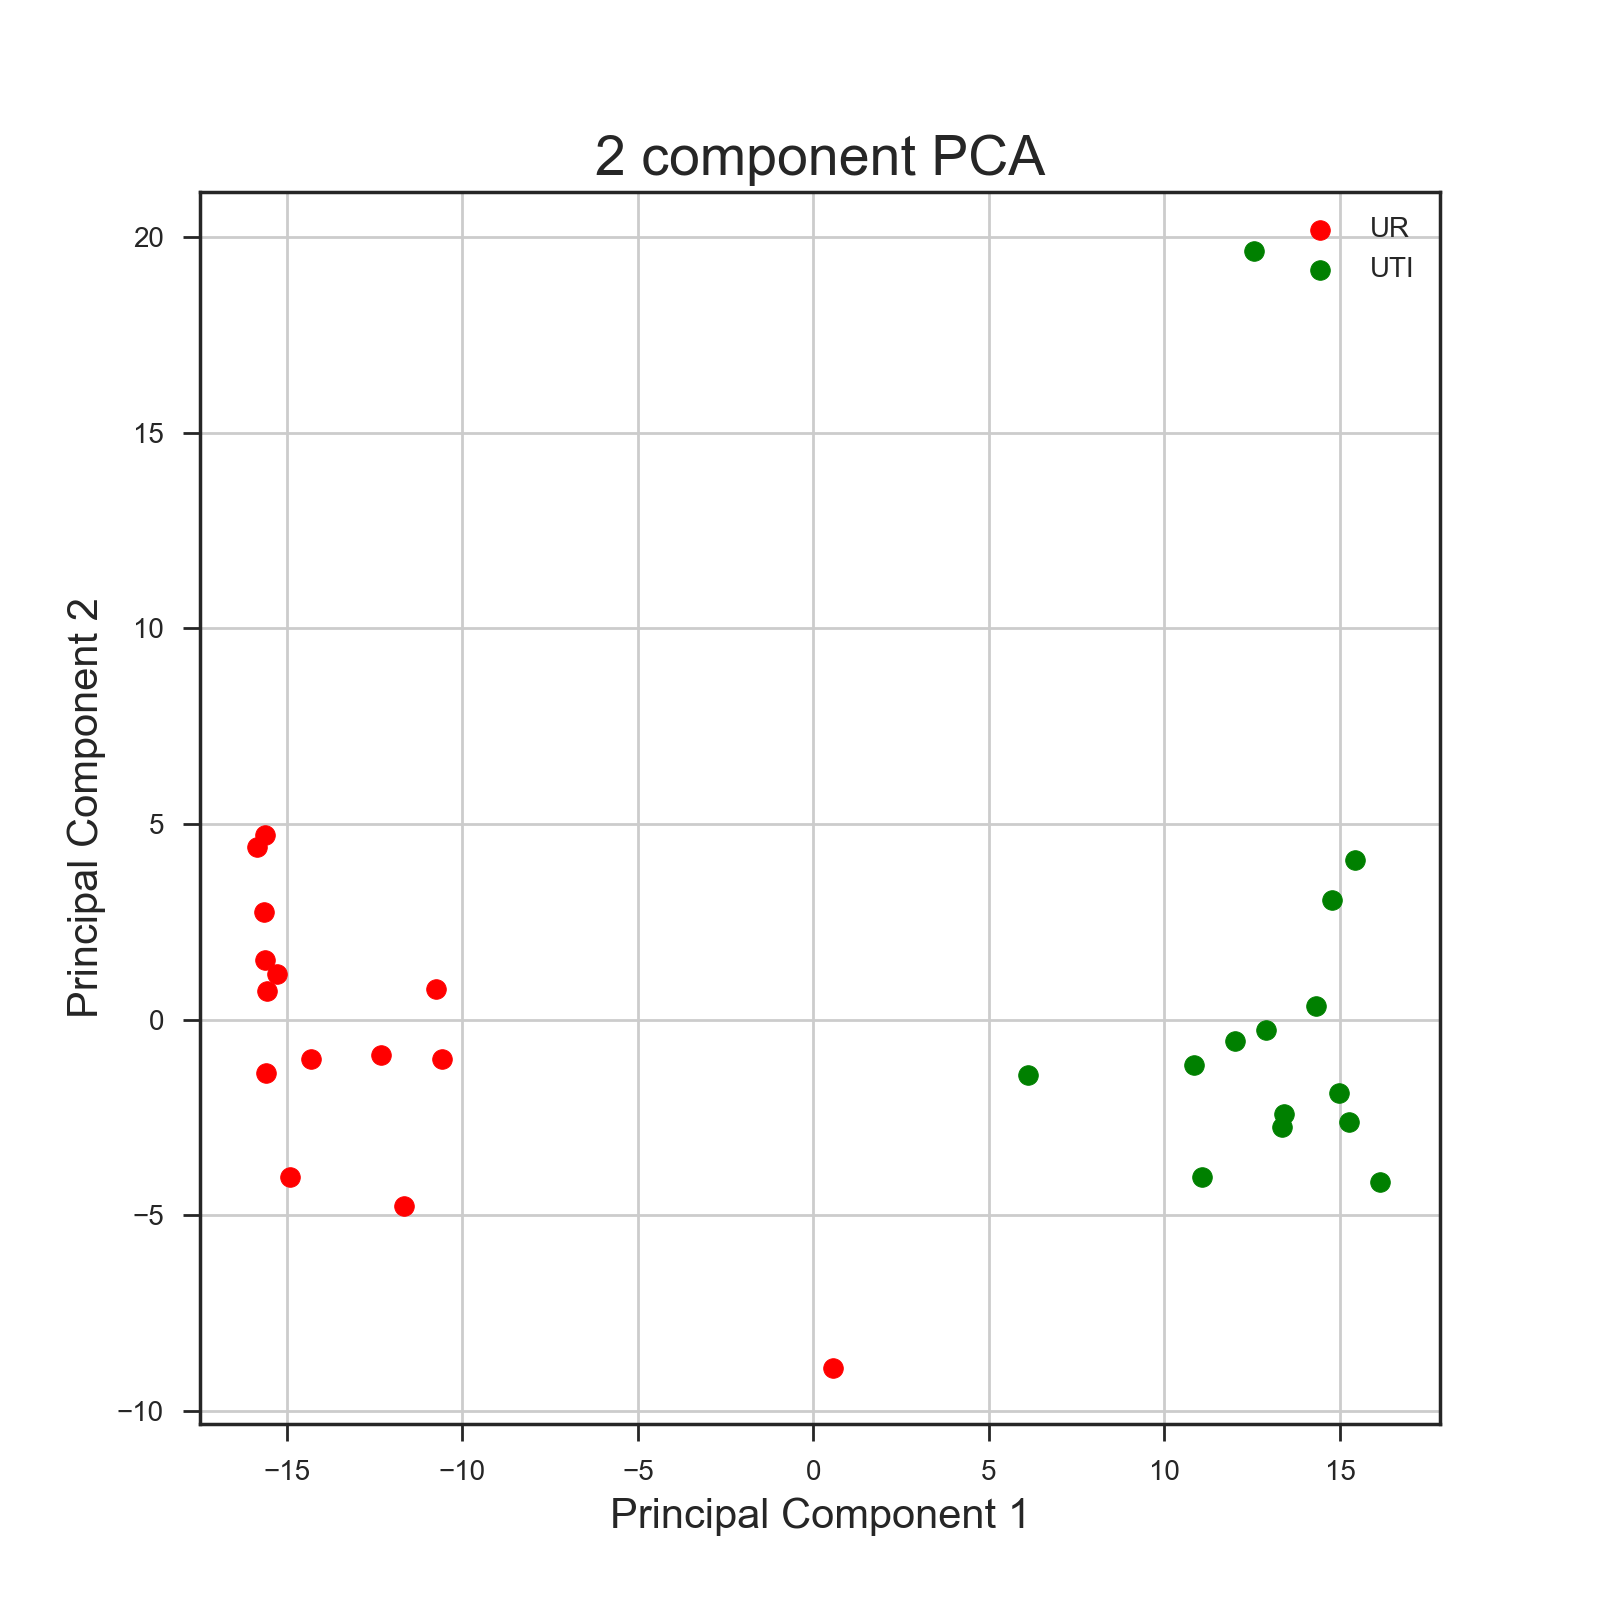

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["UR", "UTI"]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['names'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
#Add genome lables, phylogroup labels 

In [23]:
metadata="/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/data/Patient_meta_info.csv"
meta = pd.read_csv(metadata)
meta.head()

Unnamed: 0 STRAIN MEDIA PHYLOGROUP HISTORY PRED_PHYLO EPI_CELLS RBC ANCESTRY
0        UR1    HM1    UR          E       N          E         S   A        A
1       UTI1    HM1   UTI          E       N          E         S   A        A
2        UR3    HM3    UR         B1       N         B1         S   N        B
3       UTI3    HM3   UTI         B1       N         B1         S   N        B
4        UR6    HM6    UR         B2       N         B2         S   A        C

In [24]:
new_strains = {"HM1":"HM01", "HM3":"HM03", "HM6":"HM06", "HM7":"HM07"}
meta["STRAIN"] = [new_strains[s] if s in new_strains.keys() else s for s in meta["STRAIN"]]
new_index = meta["STRAIN"]+"_" + meta["MEDIA"]
meta.set_index(new_index, inplace=True)
meta

Unnamed: 0 STRAIN MEDIA PHYLOGROUP HISTORY PRED_PHYLO EPI_CELLS  RBC  \
HM01_UR         UR1   HM01    UR          E       N          E         S    A   
HM01_UTI       UTI1   HM01   UTI          E       N          E         S    A   
HM03_UR         UR3   HM03    UR         B1       N         B1         S    N   
HM03_UTI       UTI3   HM03   UTI         B1       N         B1         S    N   
HM06_UR         UR6   HM06    UR         B2       N         B2         S    A   
HM06_UTI       UTI6   HM06   UTI         B2       N         B2         S    A   
HM07_UR         UR7   HM07    UR         B1       Y         B1         S    N   
HM07_UTI       UTI7   HM07   UTI         B1       Y         B1         S    N   
HM14_UR        UR14   HM14    UR         B1       Y         B1         F    N   
HM14_UTI      UTI14   HM14   UTI         B1       Y         B1         F    N   
HM17_UR        UR17   HM17    UR         B2       Y         B2         F    N   
HM17_UTI      UTI17   HM17   UTI         B2       Y         B2         F    N   
HM43_UR        UR43   HM43    UR        NaN       Y         B2       NaN  NaN   
HM43_UTI      UTI43   HM43   UTI        NaN       Y         B2       NaN  NaN   
HM54_UR        UR54   HM54    UR        NaN       Y         B2         F    N   
HM54_UTI      UTI54   HM54   UTI        NaN       Y         B2         F    N   
HM56_UR        UR56   HM56    UR         B2       Y         B2       NaN    N   
HM56_UTI      UTI56   HM56   UTI         B2       Y         B2       NaN    N   
HM57_UR        UR57   HM57    UR         B2       Y         B2         S    A   
HM57_UTI      UTI57   HM57   UTI         B2       Y         B2         S    A   
HM66_UR        UR66   HM66    UR        NaN       Y         B2       NaN    N   
HM66_UTI      UTI66   HM66   UTI        NaN       Y         B2       NaN    N   
HM68_UR        UR68   HM68    UR        NaN       N         B2         F    A   
HM68_UTI      UTI68   HM68   UTI        NaN       N         B2         F    A   
HM86_UR        UR86   HM86    UR        NaN       N         B2       NaN    N   
HM86_UTI      UTI86   HM86   UTI        NaN       N         B2       NaN    N   

         ANCESTRY  
HM01_UR         A  
HM01_UTI        A  
HM03_UR         B  
HM03_UTI        B  
HM06_UR         C  
HM06_UTI        C  
HM07_UR         B  
HM07_UTI        B  
HM14_UR         B  
HM14_UTI        B  
HM17_UR         E  
HM17_UTI        E  
HM43_UR         C  
HM43_UTI        C  
HM54_UR         C  
HM54_UTI        C  
HM56_UR         C  
HM56_UTI        C  
HM57_UR         E  
HM57_UTI        E  
HM66_UR         C  
HM66_UTI        C  
HM68_UR         D  
HM68_UTI        D  
HM86_UR         C  
HM86_UTI        C

In [25]:
finalDf2 = finalDf.merge(meta, how="outer", left_index=True, right_index=True)
finalDf2.head()

principal component 1  principal component 2 names Unnamed: 0  \
HM01_UR              -15.269585               1.172566    UR        UR1   
HM01_UTI              16.142744              -4.146577   UTI       UTI1   
HM03_UR              -15.861711               4.416765    UR        UR3   
HM03_UTI              14.964713              -1.883474   UTI       UTI3   
HM06_UR              -10.748374               0.774322    UR        UR6   

         STRAIN MEDIA PHYLOGROUP HISTORY PRED_PHYLO EPI_CELLS RBC ANCESTRY  
HM01_UR    HM01    UR          E       N          E         S   A        A  
HM01_UTI   HM01   UTI          E       N          E         S   A        A  
HM03_UR    HM03    UR         B1       N         B1         S   N        B  
HM03_UTI   HM03   UTI         B1       N         B1         S   N        B  
HM06_UR    HM06    UR         B2       N         B2         S   A        C

<IPython.core.display.Javascript object>


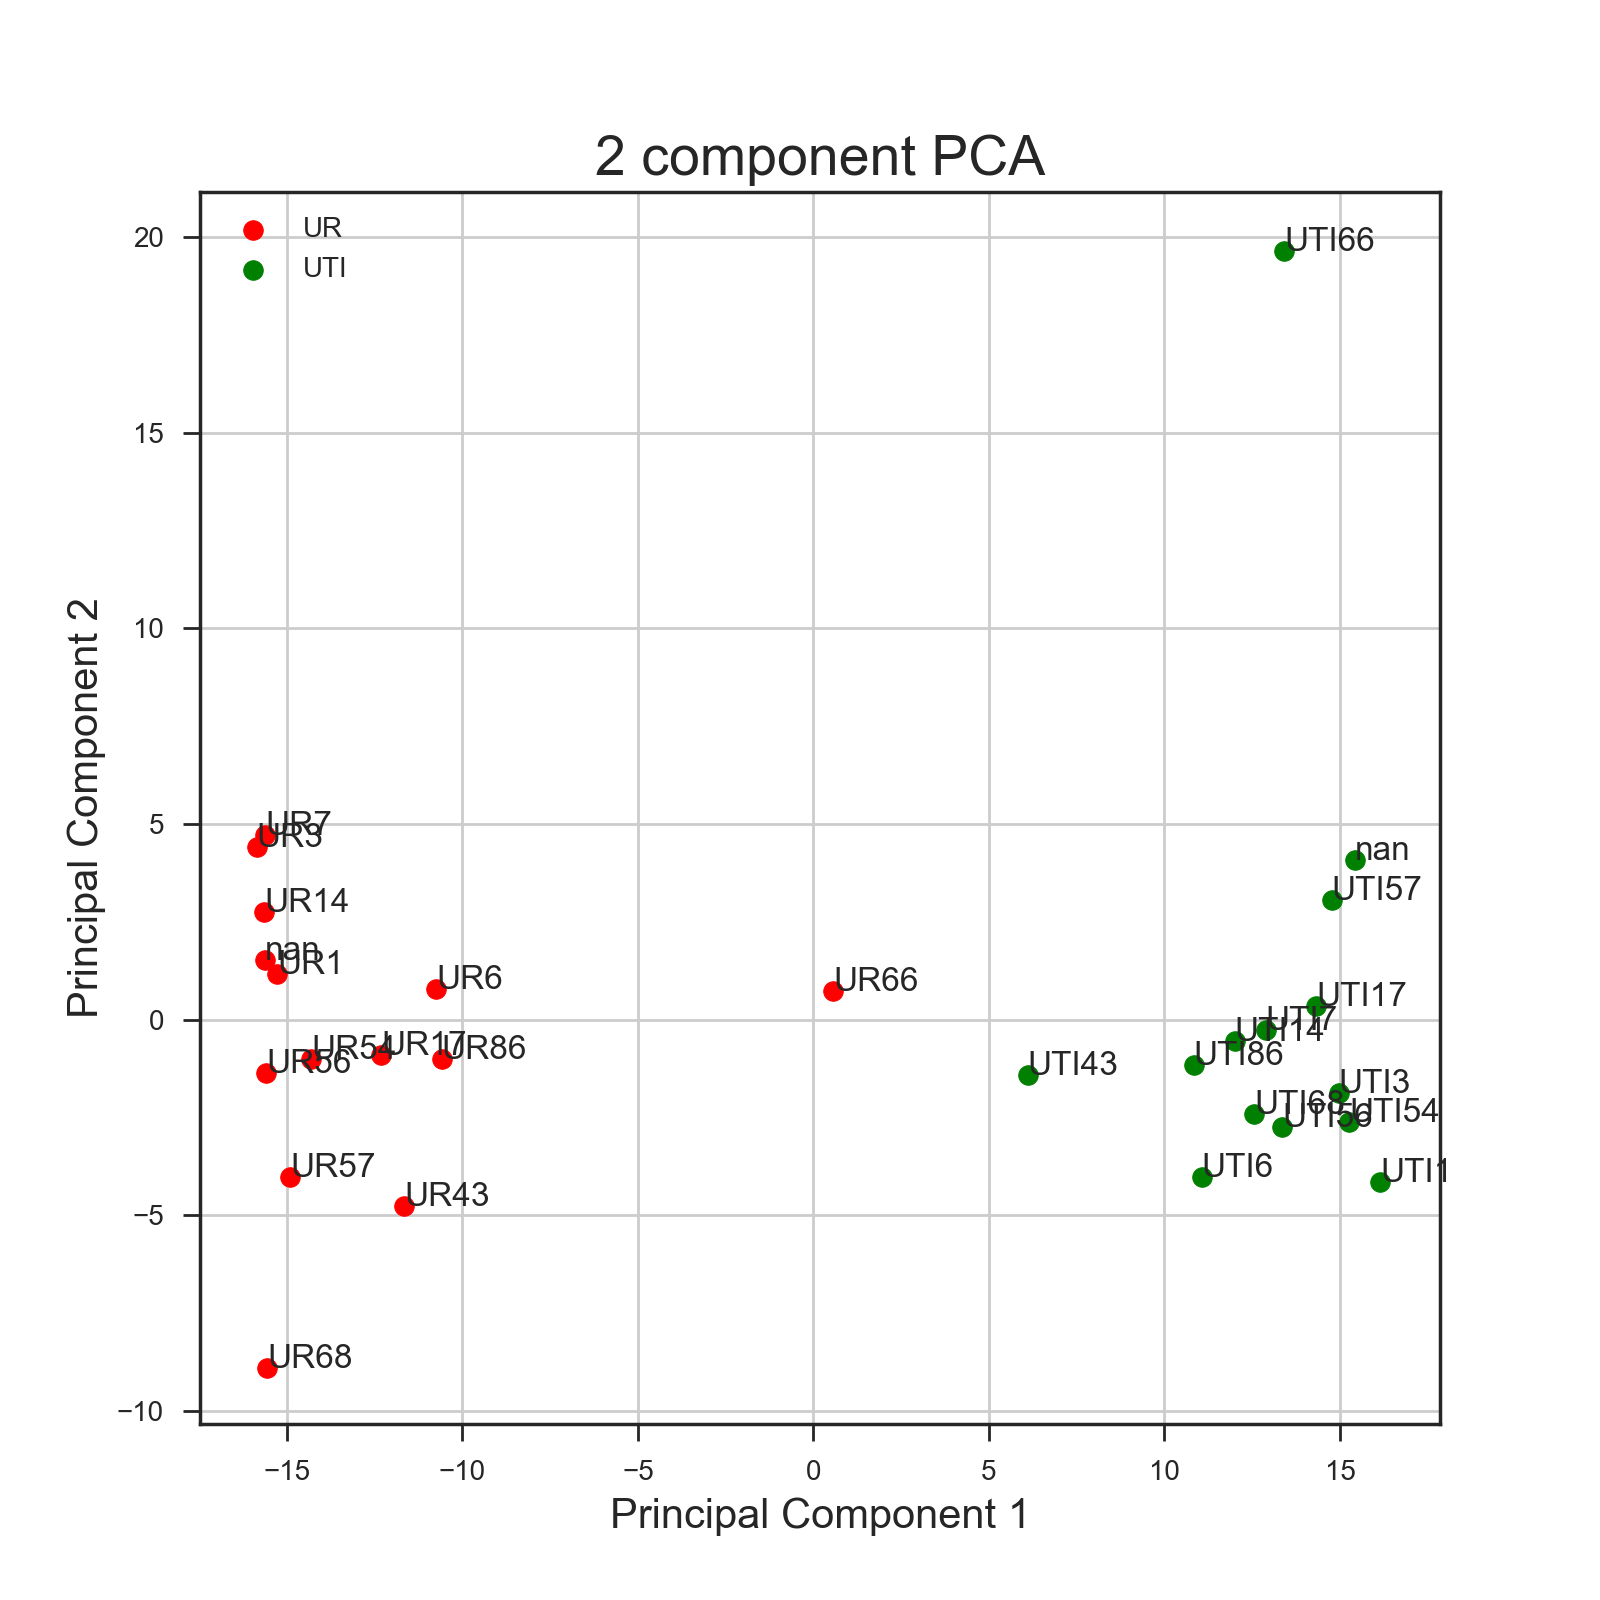

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["UR", "UTI"]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf2['names'] == target
    labels = finalDf2.loc[indicesToKeep, 'Unnamed: 0']
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf2.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x, y, c = color, s = 50)
    
    for i in range(len(x)):
        xy = (x[i], y[i])
        label = labels[i]
        ax.annotate(label, xy)
#ax.annotate(labels, (x,y))
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


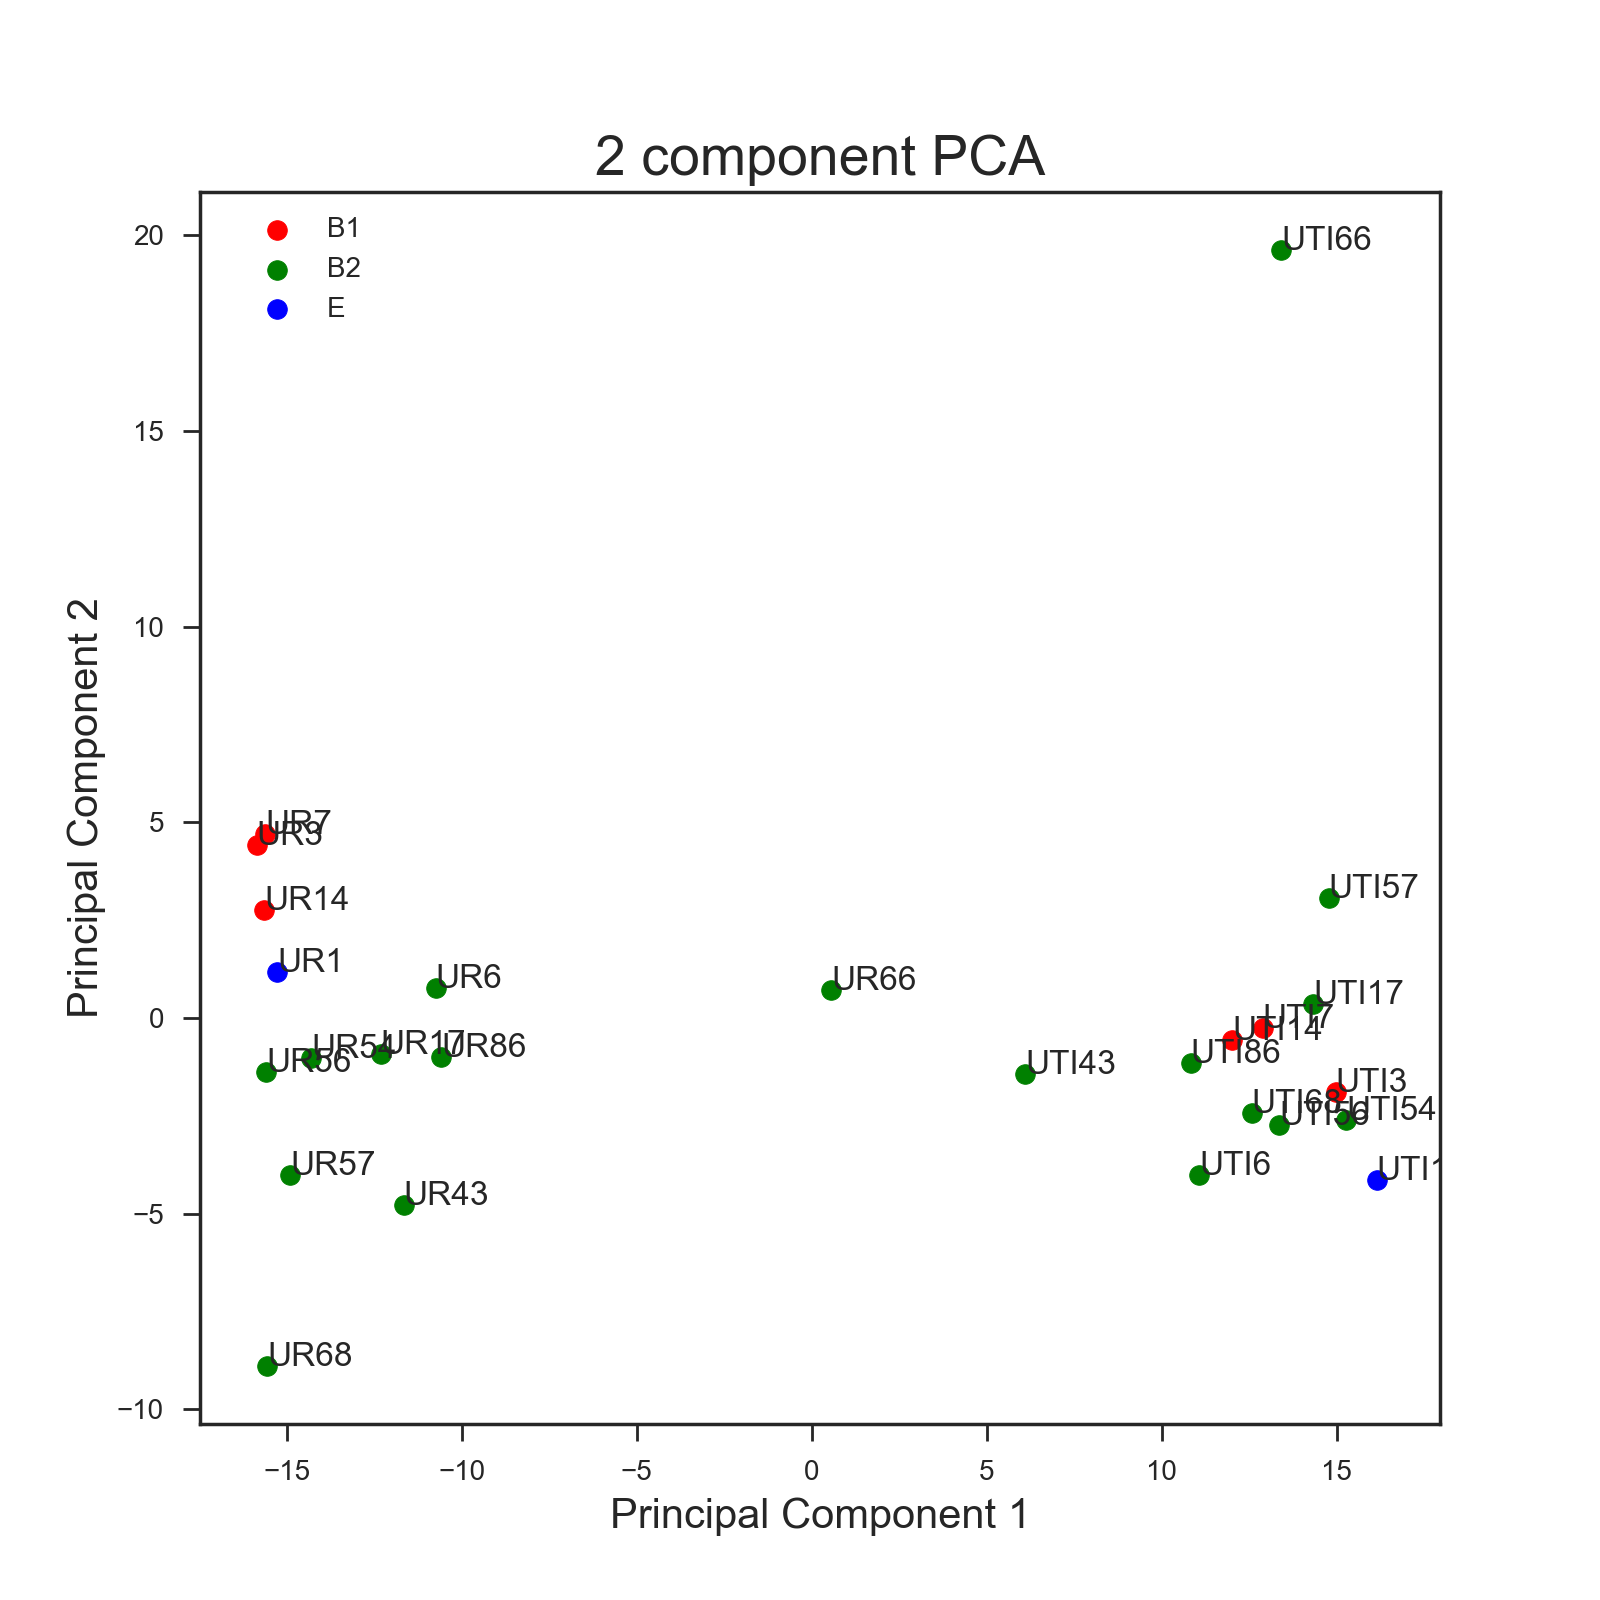

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["B1", "B2", "E"]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf2['PRED_PHYLO'] == target
    labels = finalDf2.loc[indicesToKeep, 'Unnamed: 0']
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf2.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x, y, c = color, s = 50)
    
    for i in range(len(x)):
        xy = (x[i], y[i])
        label = labels[i]
        ax.annotate(label, xy)
#ax.annotate(labels, (x,y))
ax.legend(targets, bbox_to_anchor=(0.15, 1))


//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,8,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:

counts2 = pd.read_csv(data, index_col=0)

to_drop = [c for c in list(counts.columns) if 'counts' in c or 'Unnamed' in c or 'seq' in c]


gpg = ['b3429',
'b3430',
'b3431',
'b3432',
'b3433',
'b3434']

counts2.drop(to_drop, axis=1, inplace=True)
counts2.dropna(subset = ["MG1655"], inplace=True)

counts2.set_index('MG1655', inplace=True)
gpg_df = counts2.ix[gpg]
to_keep = [c for c in list(gpg_df.columns) if 'RPKM' in c and 'seq' not in c]
gpg_df = gpg_df[to_keep].T
gpg_df['names'] = [i.split("_")[1] for i in list(gpg_df.index)]
gpg_df.head()

#counts2.head()
#counts2 = counts.select_dtypes(include=["float64"])

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,8,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MG1655          b3429   b3430   b3431   b3432   b3433  b3434 names
HM01_UR_RPKM   233.95  359.43  154.18  171.22  712.25  50.62    UR
HM01_UTI_RPKM    3.24    4.93    1.92    3.54   23.58   6.84   UTI
HM03_UR_RPKM   231.69  372.78  123.28  168.42  621.88  52.20    UR
HM03_UTI_RPKM    8.94   16.15    7.02    9.84   53.49  32.11   UTI
HM06_UR_RPKM   237.91  347.36  141.07  153.00  422.11  53.20    UR

<IPython.core.display.Javascript object>


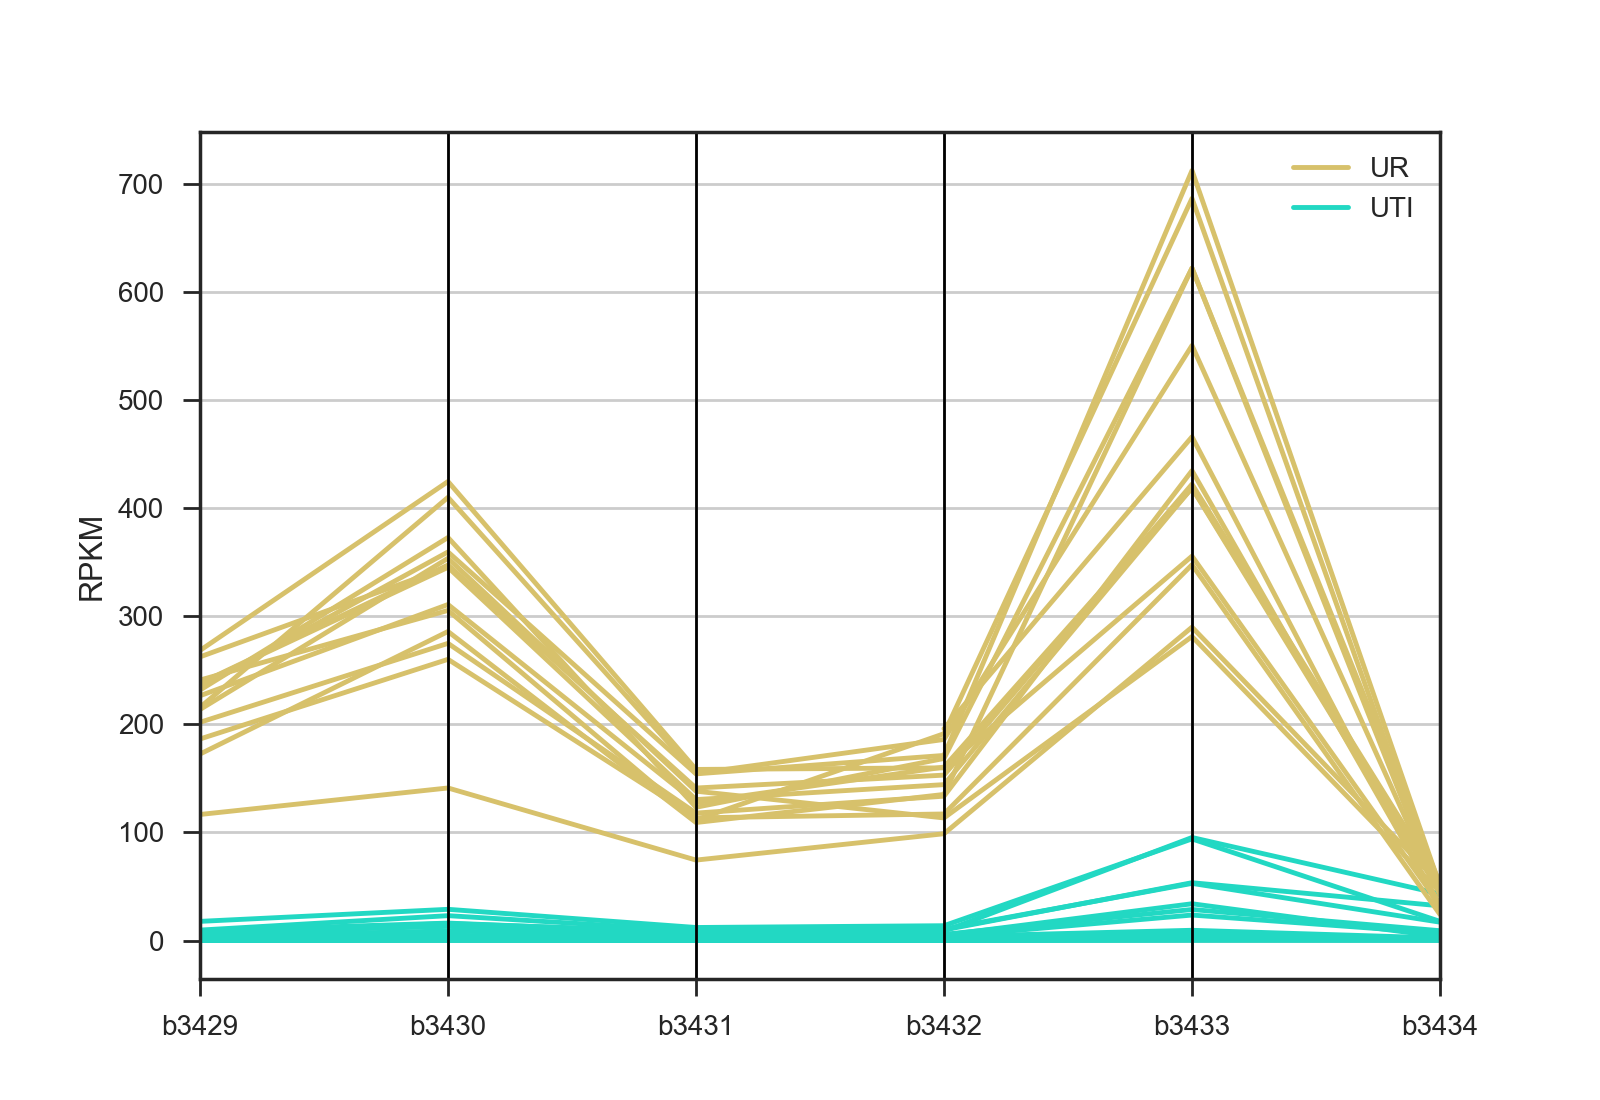

In [90]:
#Glycogen metabolism

ax = pd.tools.plotting.parallel_coordinates(gpg_df, 'names')
ax.set_ylabel("RPKM")
ax.set_title("Glycogen Metabolism")

<IPython.core.display.Javascript object>


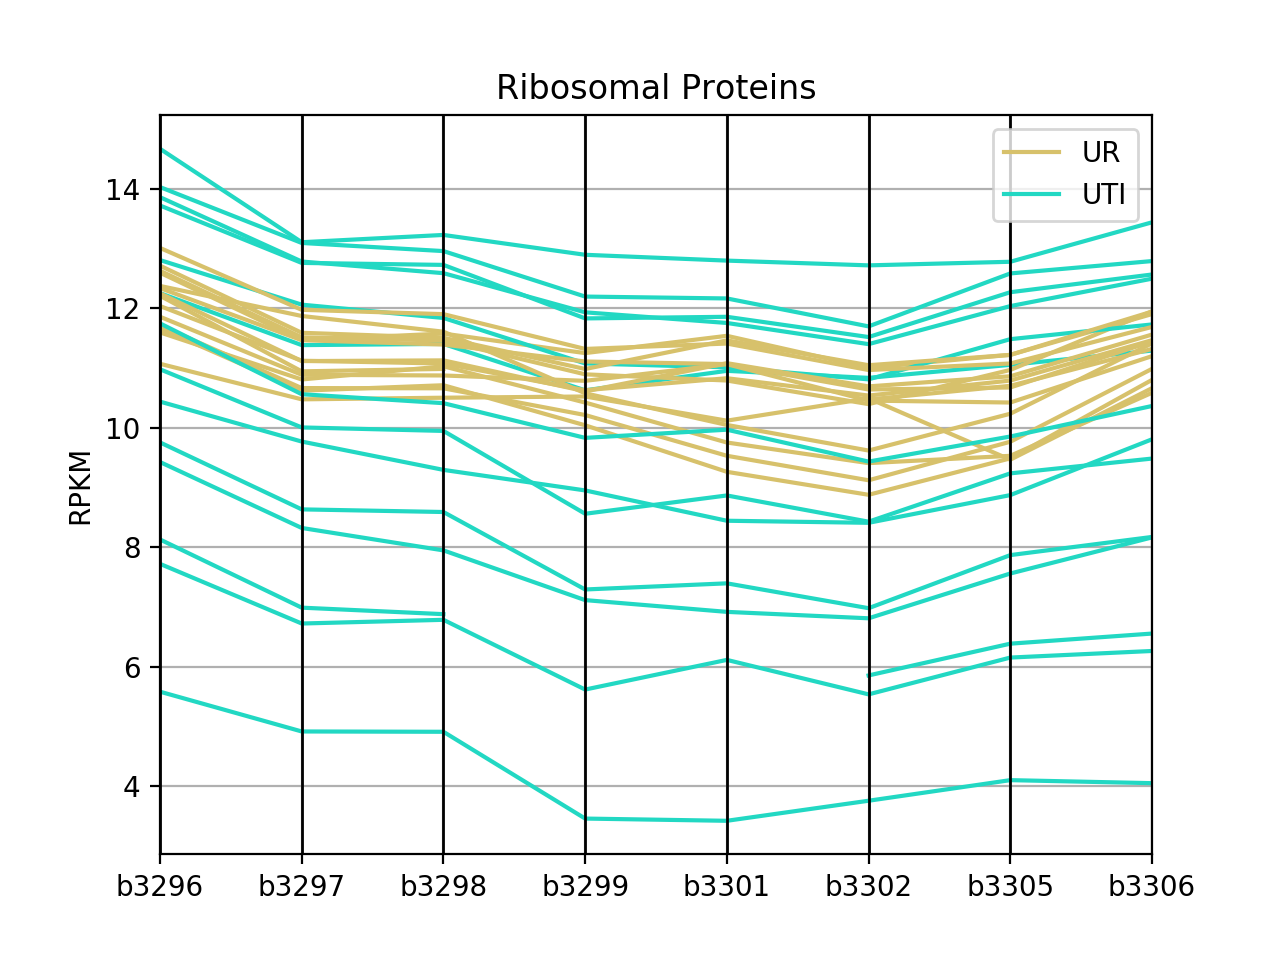

In [26]:
ribo = [
       'b3296',
       'b3297',
       'b3298',
       'b3299',
    'b3301','b3302', 
'b3305', 'b3306']
ribo_df = counts2.ix[ribo]
to_keep = [c for c in list(ribo_df.columns) if 'RPKM' in c and 'seq' not in c]
ribo_df = ribo_df[to_keep].T
ribo_df = np.log2(ribo_df+1)
ribo_df['names'] = [i.split("_")[1] for i in list(ribo_df.index)]
ribo_df.head()
plt.figure()
ax2 = pd.tools.plotting.parallel_coordinates(ribo_df, 'names')
ax2.set_ylabel("RPKM")
ax2.set_title("Ribosomal Proteins")


2.3219280948873622